# False Discovery Rate Plot from GNPS Output
    Basic notebook to generate a nice plot of the FDR output from GNPS - 1% and 5% lines are added - left plot is full FDR region while the right plot is a zoomed in region to better assess the 1% and 5% lines

In [2]:
suppressMessages(library(Hmisc))

## Read in the .tsv GNPS output
    change the filename to match your GNPS output

In [4]:
tab <- read.delim("MOLECULAR-LIBRARYSEARCH-FDR-5b942429-view_all_annotations_DB_fdr-main.tsv")
fdr_4min <- tab[,c("MQScore","fdr")]
head(fdr_4min)

MQScore,fdr
0.100001,0.5321923
0.126464,0.5321888
0.113168,0.5321888
0.164659,0.5321888
0.115980,0.5321888
0.131032,0.5321888


## Additional FDR result files (.tsv) - use if necessary
    use these if you desire to plot more than one FDR output at once (e.g. different min match peaks)

In [5]:
tab2 <- read.delim("MOLECULAR-LIBRARYSEARCH-FDR-4fd62046-view_all_annotations_DB_fdr-main.tsv")
fdr_5min <- tab2[,c("MQScore","fdr")]
dim(fdr_5min)
tab3 <- read.delim("MOLECULAR-LIBRARYSEARCH-FDR-d6885e52-view_all_annotations_DB_fdr-main.tsv")
fdr_6min <- tab3[,c("MQScore","fdr")]
dim(fdr_6min)

[1] 69558     2

[1] 34296     2

## All headers
    FYI

In [6]:
colnames(tab)

[1] "X.Scan."              "Adduct"               "CAS_Number"          
 [4] "Charge"               "Compound_Name"        "Compound_Source"     
 [7] "Data_Collector"       "ExactMass"            "FileScanUniqueID"    
[10] "INCHI"                "INCHI_AUX"            "Instrument"          
[13] "IonMode"              "Ion_Source"           "LibMZ"               
[16] "LibraryName"          "LibraryQualityString" "Library_Class"       
[19] "MQScore"              "MZErrorPPM"           "MassDiff"            
[22] "NumberHits"           "Organism"             "PI"                  
[25] "Precursor_MZ"         "Pubmed_ID"            "RT_Query"            
[28] "SharedPeaks"          "Smiles"               "SpecCharge"          
[31] "SpecMZ"               "SpectrumFile"         "SpectrumID"          
[34] "TIC_Query"            "UpdateWorkflowName"   "fdr"                 
[37] "tags"                 "internalFilename"

## Plot

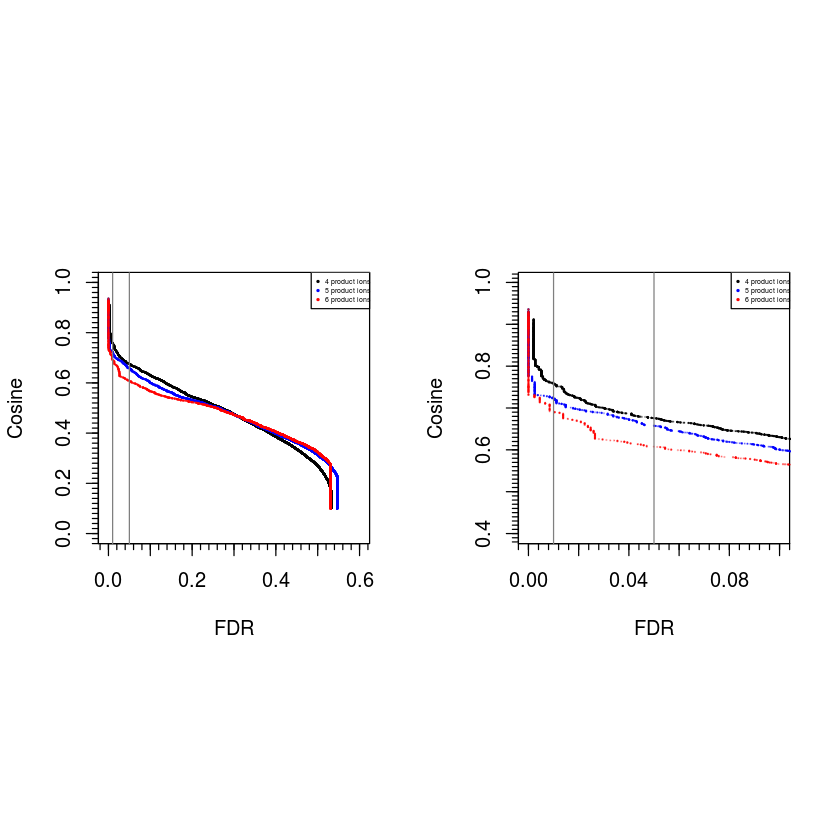

In [7]:
par(mfrow=c(1,2))
par(pty="s")
plot(fdr_4min[,2],fdr_4min[,1], pch = 20, cex=0.1, col=adjustcolor("black", 0.35), 
     xlab="FDR", ylab="Cosine", 
     xlim=c(0, 0.6), ylim=c(0, 1))
    points(fdr_5min[,2],fdr_5min[,1], pch = 20, cex=0.1, col=adjustcolor("blue", 0.35))
    points(fdr_6min[,2],fdr_6min[,1], pch = 20, cex=0.1, col=adjustcolor("red", 0.35))
        minor.tick(nx=5, ny=10, tick.ratio=0.5)
        abline(v=0.05, col = "gray50")
        abline(v=0.01, col = "gray50")
        legend("topright", legend = c("4 product ions", "5 product ions", "6 product ions"), pch = 20, cex = 0.35, col = c("black","blue","red"))
plot(fdr_4min[,2],fdr_4min[,1], pch = 20, cex=0.1, col=adjustcolor("black", 0.35), 
     xlab="FDR", ylab="Cosine", 
     xlim=c(0, 0.1), ylim=c(0.4, 1))
    points(fdr_5min[,2],fdr_5min[,1], pch = 20, cex=0.1, col=adjustcolor("blue", 0.35))
    points(fdr_6min[,2],fdr_6min[,1], pch = 20, cex=0.1, col=adjustcolor("red", 0.35))
        minor.tick(nx=5, ny=10, tick.ratio=0.5)
        abline(v=0.05, col = "gray50")
        abline(v=0.01, col = "gray50")
        legend("topright", legend = c("4 product ions", "5 product ions", "6 product ions"), pch = 20, cex = 0.35, col = c("black","blue","red"))

## Calculate Number of GNPS hits at 1% FDR (must supply the cosine value)

In [8]:
#input FDR_6min cos
minmatch6_cos <- 0.70
minmatch5_cos <- 0.72
minmatch4_cos <- 0.75

sum(fdr_6min$MQScore >= minmatch6_cos)
sum(fdr_6min$MQScore <= minmatch6_cos)
sum(sum(fdr_6min$MQScore >= minmatch6_cos),sum(fdr_6min$MQScore <= minmatch6_cos))
'------------'
sum(fdr_5min$MQScore >= minmatch5_cos)
sum(fdr_5min$MQScore <= minmatch5_cos)
sum(sum(fdr_5min$MQScore >= minmatch5_cos),sum(fdr_5min$MQScore <= minmatch5_cos))
'------------'
sum(fdr_4min$MQScore >= minmatch4_cos)
sum(fdr_4min$MQScore <= minmatch4_cos)
sum(sum(fdr_4min$MQScore >= minmatch4_cos),sum(fdr_4min$MQScore <= minmatch4_cos))

[1] 460

[1] 33836

[1] 34296

[1] "------------"

[1] 845

[1] 68713

[1] 69558

[1] "------------"

[1] 1519

[1] 111806

[1] 113325